# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#1- Read the Data

In [7]:
df=pd.read_csv("/content/balanc_diet.csv")
df

,ID,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
0,5398,68.0,Female,Unemployed,6.627585,1.861374,1898.520157
1,3078,19.0,Female,Desk Job,5.671469,1.732762,2439.173224
2,6051,50.0,Female,Freelancer,7.060029,1.509387,1746.165518
3,6503,54.0,Male,Healthcare,4.154597,1.832796,2461.167138
4,3602,27.0,Female,Desk Job,3.847020,1.624670,2105.472452
...,...,...,...,...,...,...,...
10195,3100,35.0,Female,Desk Job,8.164440,1.475782,2360.129593
10196,6185,40.0,Male,Desk Job,8.251327,1.969487,2523.668562
10197,3562,37.0,Male,Freelancer,7.691461,1.603877,2859.715104
10198,5893,60.0,Female,Student,6.960608,1.552269,2455.459190


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10200 non-null  int64  
 1   Age                      10171 non-null  float64
 2   Gender                   10200 non-null  object 
 3   Working_Type             10171 non-null  object 
 4   Sleep_Hours              10171 non-null  float64
 5   Height_m                 10171 non-null  float64
 6   Required_Daily_Calories  10171 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 557.9+ KB


In [9]:
df.drop("ID", axis=1, inplace=True)

In [10]:
df.head()

,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
0,68.0,Female,Unemployed,6.627585,1.861374,1898.520157
1,19.0,Female,Desk Job,5.671469,1.732762,2439.173224
2,50.0,Female,Freelancer,7.060029,1.509387,1746.165518
3,54.0,Male,Healthcare,4.154597,1.832796,2461.167138
4,27.0,Female,Desk Job,3.847020,1.624670,2105.472452


# 2- Check for Null Values

In [11]:
dtypes =df.dtypes
number_of_nullvalues=df.isnull().sum()
pd.DataFrame({"Dtypes":dtypes,"num_null_value":number_of_nullvalues}).T


,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
Dtypes,float64,object,object,float64,float64,float64
num_null_value,29,0,29,29,29,29


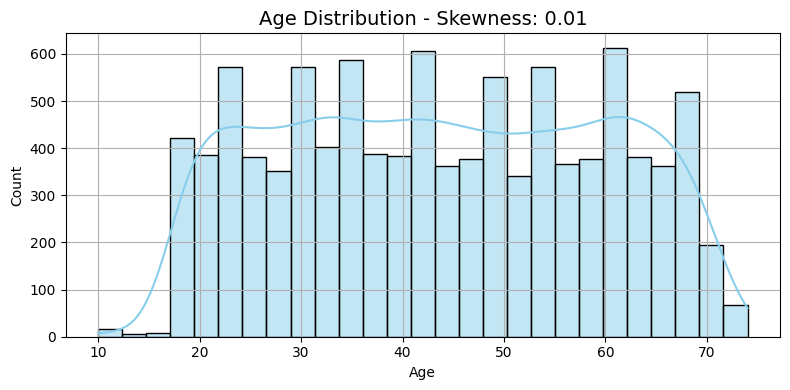

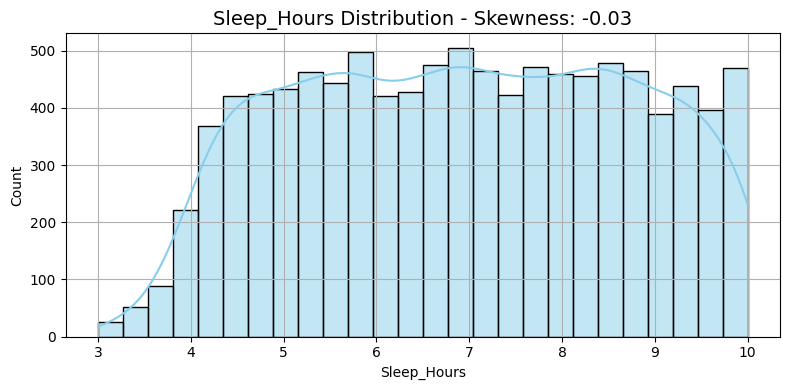

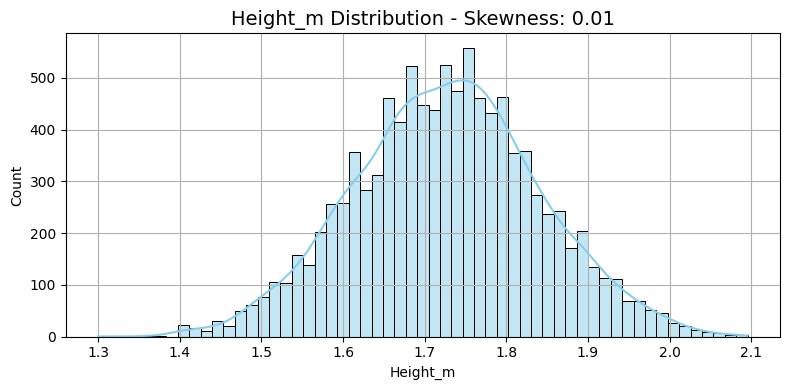

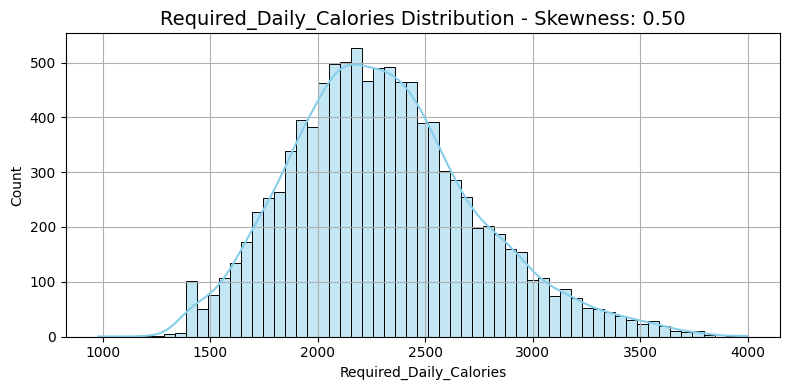

In [12]:

numeric_cols = ['Age', 'Sleep_Hours', 'Height_m', 'Required_Daily_Calories']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    skew_val = df[col].skew()
    plt.title(f"{col} Distribution - Skewness: {skew_val:.2f}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


- **Replace Null Values in Age  ,Sleep_Hours , Height_m ,Required_Daily_Calories  columns**


In [13]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Sleep_Hours'].fillna(df['Sleep_Hours'].mean(), inplace=True)
df['Height_m'].fillna(df['Height_m'].mean(), inplace=True)
df['Required_Daily_Calories'].fillna(df['Required_Daily_Calories'].median(), inplace=True)


/tmp/ipython-input-13-937392297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-13-937392297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [14]:
df['Working_Type'].fillna(df['Working_Type'].mode()[0], inplace=True)


/tmp/ipython-input-14-4779713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Working_Type'].fillna(df['Working_Type'].mode()[0], inplace=True)


In [15]:
dtypes =df.dtypes
number_of_nullvalues=df.isnull().sum()
pd.DataFrame({"Dtypes":dtypes,"num_null_value":number_of_nullvalues}).T


,Age,Gender,Working_Type,Sleep_Hours,Height_m,Required_Daily_Calories
Dtypes,float64,object,object,float64,float64,float64
num_null_value,0,0,0,0,0,0


# 3- Handle Outliers

- **Check for Outliers**

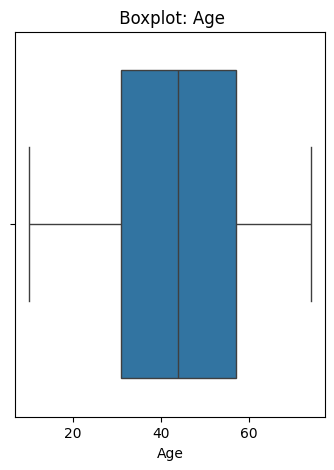

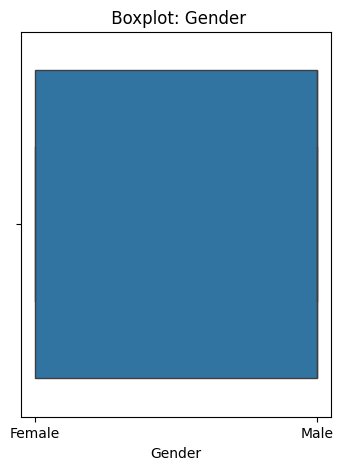

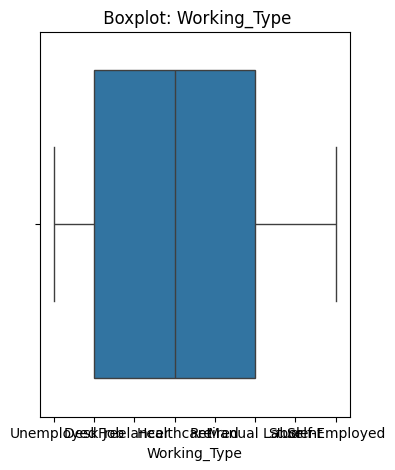

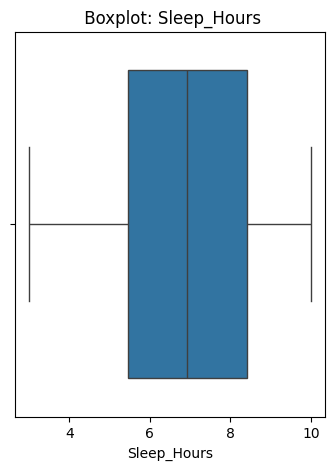

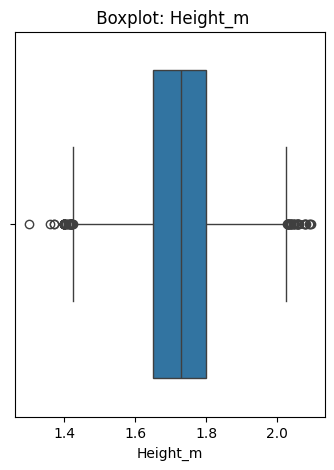

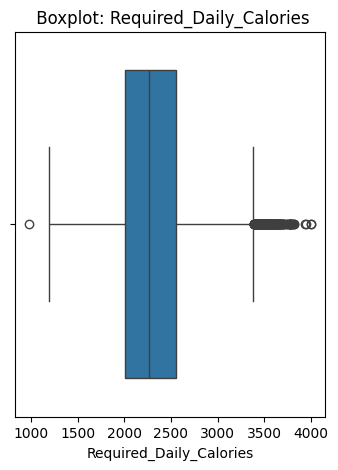

In [16]:
for col in df:
    plt.figure(figsize=(4,5))
    sns.boxplot(data=df, x=col)
    plt.title(f" Boxplot: {col}")
    plt.show()


In [17]:

Q1 = df['Height_m'].quantile(0.25)
Q3 = df['Height_m'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Height_m'] < lower_bound) | (df['Height_m'] > upper_bound)]
print(f"  The number of outliers Height_m: {outliers.shape[0]}")


Q1 = df['Required_Daily_Calories'].quantile(0.25)
Q3 = df['Required_Daily_Calories'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Required_Daily_Calories'] < lower_bound) | (df['Required_Daily_Calories'] > upper_bound)]
print(f"  the number of outliers Required_Daily_Calories: {outliers.shape[0]}")


  The number of outliers Height_m: 74
  the number of outliers Required_Daily_Calories: 178


In [18]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower, upper)
cap_outliers(df, 'Height_m')
cap_outliers(df, 'Required_Daily_Calories')


- **Check for Outliers**

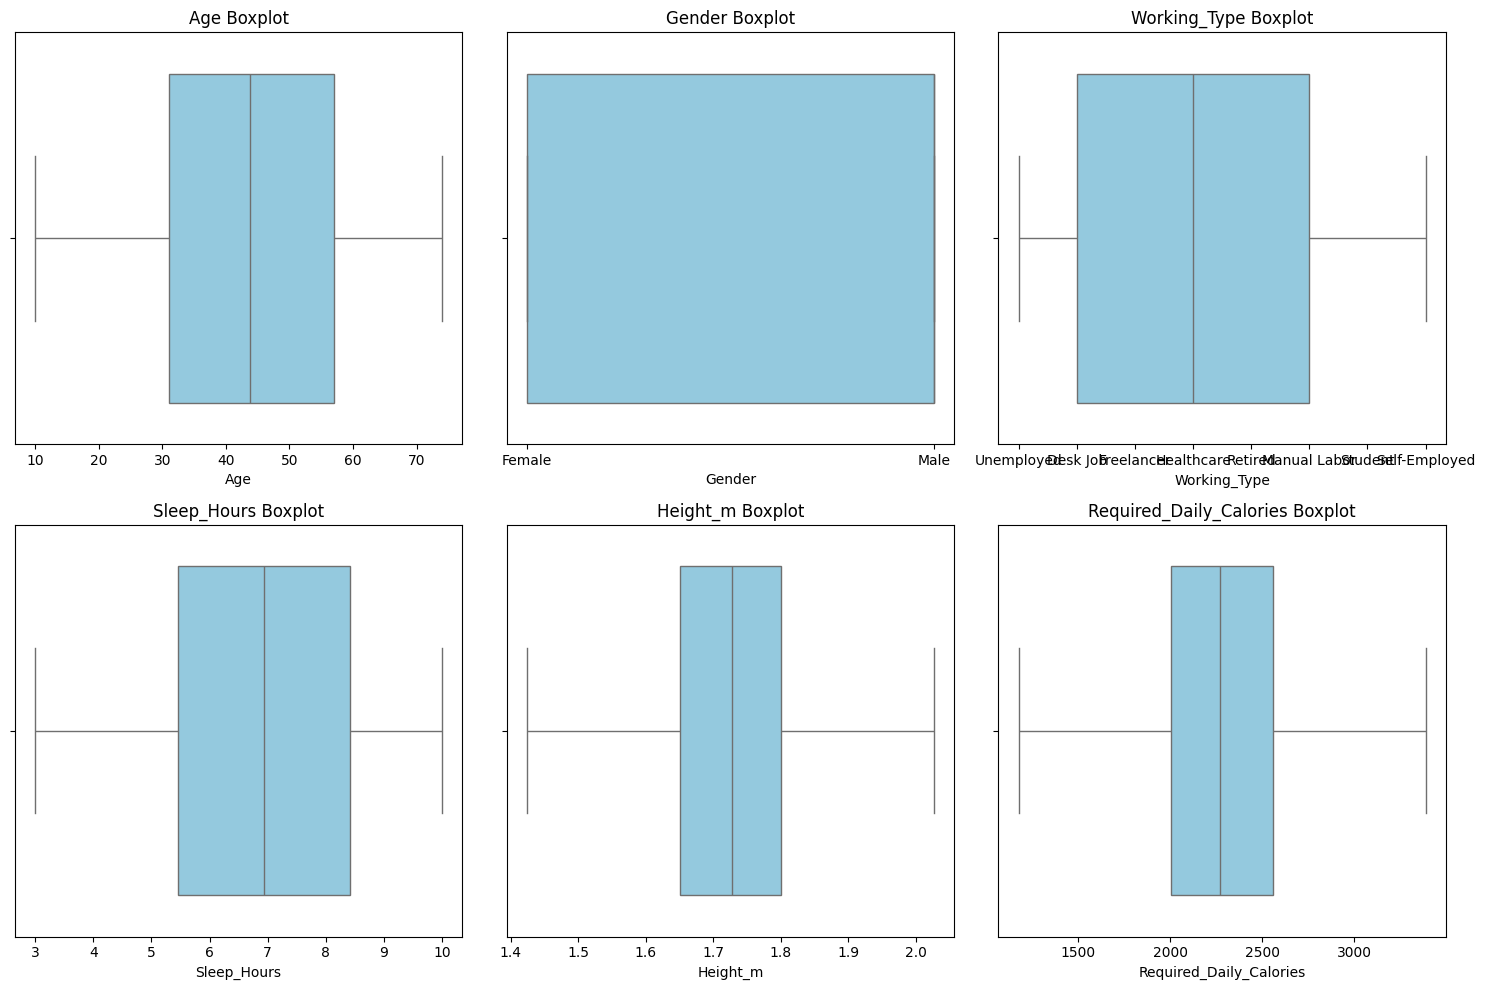

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = df.columns
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col], orient='h', color='skyblue')
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

# 4- Visualization

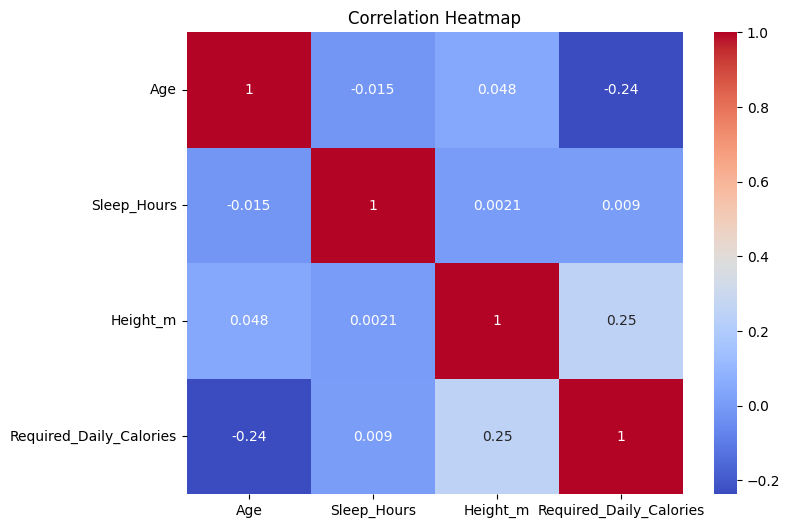

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes("number")
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


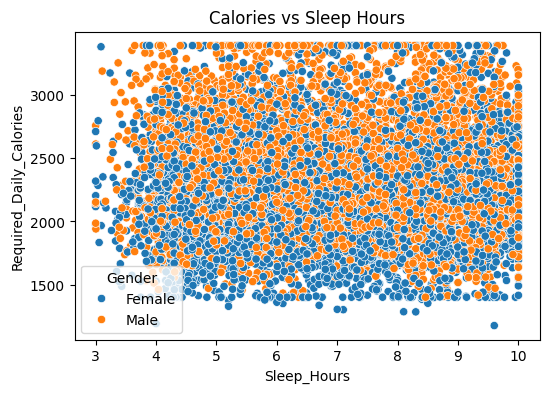

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Sleep_Hours", y="Required_Daily_Calories", hue="Gender")
plt.title("Calories vs Sleep Hours")
plt.show()


/tmp/ipython-input-27-3858927958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Working_Type", y="Required_Daily_Calories", estimator="mean", palette="coolwarm")


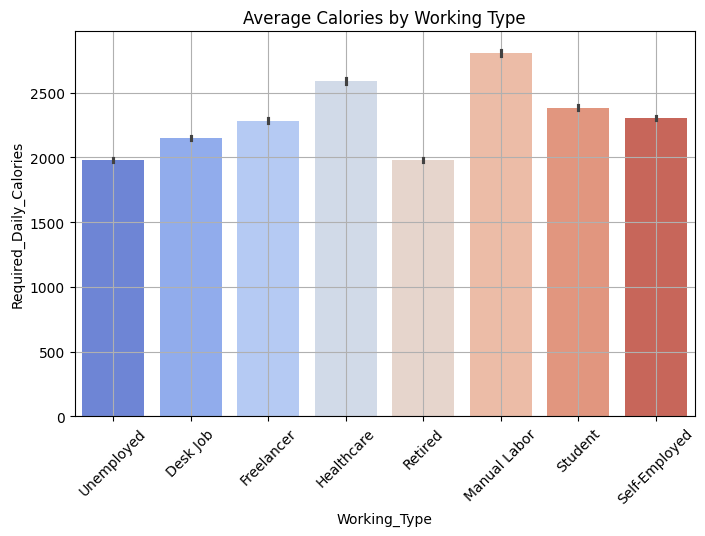

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Working_Type", y="Required_Daily_Calories", estimator="mean", palette="coolwarm")
plt.title("Average Calories by Working Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipython-input-28-229948847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Working_Type", y="Required_Daily_Calories", palette="Set3")


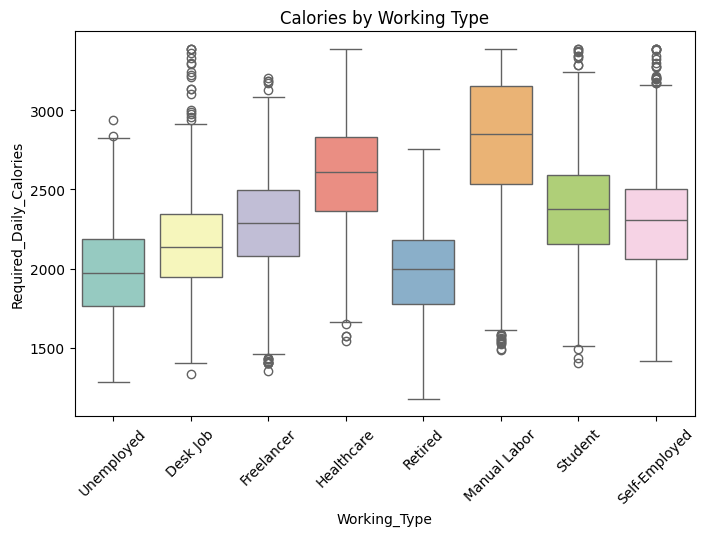

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Working_Type", y="Required_Daily_Calories", palette="Set3")
plt.title("Calories by Working Type")
plt.xticks(rotation=45)
plt.show()


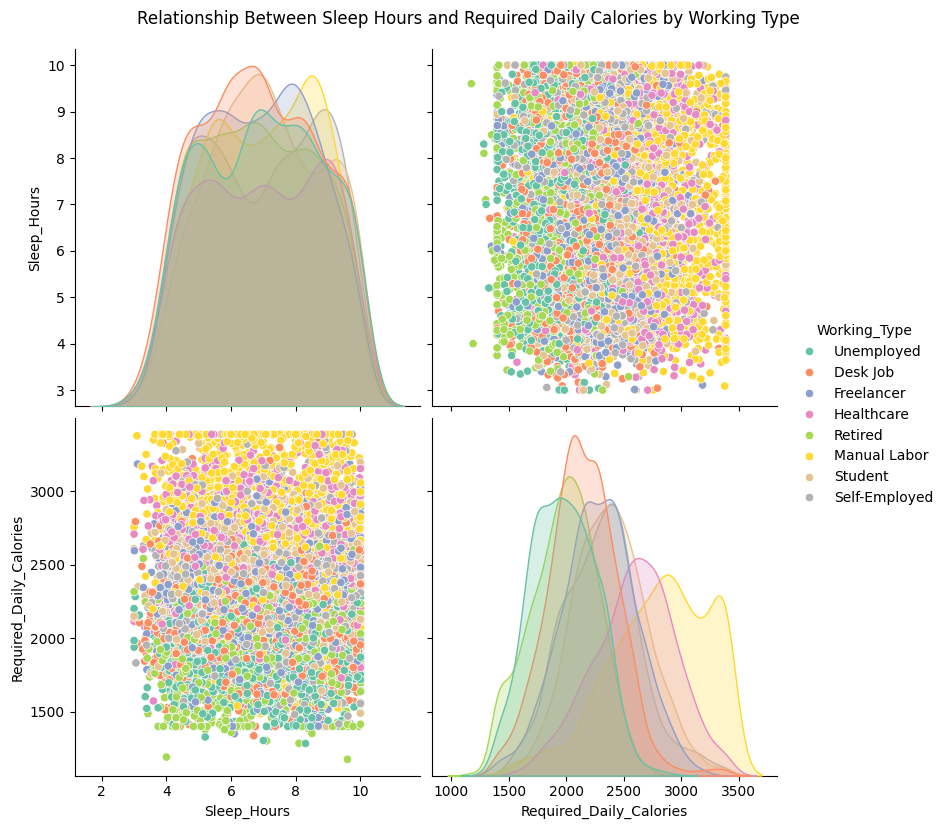

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,
             vars=['Sleep_Hours', 'Required_Daily_Calories'],
             hue='Working_Type',
             palette='Set2',
             height=4)
plt.suptitle("Relationship Between Sleep Hours and Required Daily Calories by Working Type", y=1.03)
plt.show()


# 5- Remove Duplicates

- **Check for Duplicates**

In [30]:
df.duplicated().sum()

np.int64(127)

- **Remove Duplicates**

In [31]:
df = df.drop_duplicates()

- **Make Sure that Duplicates are Removed**

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df_backup = df.copy()


# 6- Encoding




*   one hot encodeing



In [36]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
gender_encoded_array = ohe.fit_transform(df[["Gender"]])
gender_encoded_df = pd.DataFrame(gender_encoded_array, columns=ohe.get_feature_names_out(["Gender"]))
gender_encoded_df.index = df.index
df_gender_encoded = pd.concat([df.drop("Gender", axis=1), gender_encoded_df], axis=1)


In [37]:

!pip install category_encoders

import category_encoders as ce

df_gender_encoded = df_gender_encoded.dropna(subset=["Working_Type"])

binary_encoder = ce.BinaryEncoder(cols=["Working_Type"])

working_encoded = binary_encoder.fit_transform(df_gender_encoded[["Working_Type"]])

df_final = pd.concat([df_gender_encoded.drop("Working_Type", axis=1), working_encoded], axis=1)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [38]:

new_data = df_final.copy()
new_data.head()


,Age,Sleep_Hours,Height_m,Required_Daily_Calories,Gender_Male,Working_Type_0,Working_Type_1,Working_Type_2,Working_Type_3
0,68.0,6.627585,1.861374,1898.520157,0.0,0,0,0,1
1,19.0,5.671469,1.732762,2439.173224,0.0,0,0,1,0
2,50.0,7.060029,1.509387,1746.165518,0.0,0,0,1,1
3,54.0,4.154597,1.832796,2461.167138,1.0,0,1,0,0
4,27.0,3.847020,1.624670,2105.472452,0.0,0,0,1,0


# 7- Data Splitting

In [39]:
from sklearn.model_selection import train_test_split
X = new_data.drop("Required_Daily_Calories", axis=1)
y = new_data["Required_Daily_Calories"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 8- Data normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 9- modeling




* linear regression


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)



 * the best degree of Polynomial regression






In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

for degree in [2, 3, 4,5]:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Polynomial Degree {degree} - MSE: {mse:.2f}, R2: {r2:.4f}")

Polynomial Degree 2 - MSE: 77142.47, R2: 0.5584
Polynomial Degree 3 - MSE: 74920.13, R2: 0.5711
Polynomial Degree 4 - MSE: 73920.79, R2: 0.5768
Polynomial Degree 5 - MSE: 75976.50, R2: 0.5651





* Polynomial regression





In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

degree = 4

poly_model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_test_scaled)



# 10-Evaluating the Model



*  Evaluating of linear regression


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


Linear Regression Evaluation:
MSE: 100829.25492114795
RMSE: 317.536226155612
MAE: 254.2207313180245
R2 Score: 0.4227764161425246


* Evaluating the model Polynomial Regression

In [54]:

mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(" Polynomial Regression Evaluation:")
print("Degree:", degree)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)



 Polynomial Regression Evaluation:
Degree: 4
MSE: 73920.7972804104
RMSE: 271.8837937068159
MAE: 214.09630081202064
R² Score: 0.5768209577550786
